#TAG SMART EMAIL  

##Sentimental Analysis

In [7]:
!pip install vaderSentiment

In [ ]:
#import Library
import pandas as pd
import string
import numpy as np

In [12]:
import requests
url = 'https://raw.githubusercontent.com/Moly-malibu/Tag-Smart-Emails/master/Enronemails.csv?token=AN2RW2CBCCKBZJNKYW7S4NK64D6TM'
myfile = requests.get(url)
open('email.csv', 'wb').write(myfile.content)

24004915

In [13]:
#EMAILS FROM ENRON COMPANY SAMPLING
df = pd.read_csv("email.csv").drop(['Unnamed: 0'], axis=1)
print(df.shape) 
df.head(7)

(10000, 2)


,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
5,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...
6,allen-p/_sent_mail/1003.,Message-ID: <16254169.1075863688286.JavaMail.e...


In [14]:
[s.strip() for s in df['message'][100].splitlines()]

['Message-ID: <15940494.1075855689309.JavaMail.evans@thyme>',
 'Date: Wed, 16 Aug 2000 05:35:00 -0700 (PDT)',
 'From: phillip.allen@enron.com',
 'To: cooper.richey@enron.com',
 'Subject: Re:',
 'Mime-Version: 1.0',
 'Content-Type: text/plain; charset=us-ascii',
 'Content-Transfer-Encoding: 7bit',
 'X-From: Phillip K Allen',
 'X-To: Cooper Richey',
 'X-cc:',
 'X-bcc:',
 "X-Folder: \\Phillip_Allen_Dec2000\\Notes Folders\\'sent mail",
 'X-Origin: Allen-P',
 'X-FileName: pallen.nsf',
 '',
 "I tried the new address but I don't have access.  also, what do I need to",
 'enter under domain?']

In [ ]:
emails = ' '.join([s.strip() for s in df['message'][1].splitlines()][15:])

In [ ]:
#CLEAN DATASET
import re
import html
def cleanup_html(raw_html):
    clean_html = re.sub(r'<.*?>', '', raw_html)
    clean_html_http = re.sub(r'http\S+([\.]{3})?', '', clean_html)
    clean_txt = html.unescape(clean_html)
    return clean_txt
df['rating'] = df['message'].apply(cleanup_html)

In [ ]:
def cleanemail(email):
    return ' '.join([s.strip() for s in email.splitlines()][15:])

df['rating'] = df['message'].apply(cleanemail)

In [18]:
df["rating"].value_counts(sort=True).head()

 most bullish thing at this point is moving closer to everyone's psychological $4 price target and that everybody and their dog is still short.  next sellers need to be from producer community.  saw a little this week with williams hedging the barrett transaction but wouldnt say thats indicative of the rest of the e&p community.  short covering rallies will get more common here.  velocity of move down has slowed significantly for good (except maybe in bid week).  my concern is if we go to $4 and people want to cover some shorts, who's selling it to them?  might feel a lot like it did when we were trying to break $5.    9
 Tim,  mike grigsby is having problems with accessing the west power site.  Can you please make sure he has an active password.  Thank you,  Phillip                                                                                                                                                                                                                               

In [21]:
df.sort_values(by='rating', ascending=False).head(5)

,file,message,rating
9408,badeer-r/notes_inbox/62.,Message-ID: <22495830.1075863605235.JavaMail.e...,zalaywan@caiso.com Mime-Version: 1.0 Content-T...
9165,badeer-r/discussion_threads/215.,Message-ID: <26362480.1075863601560.JavaMail.e...,zalaywan@caiso.com Mime-Version: 1.0 Content-T...
8896,badeer-r/all_documents/62.,Message-ID: <9019069.1075863588438.JavaMail.ev...,zalaywan@caiso.com Mime-Version: 1.0 Content-T...
8306,arora-h/inbox/69.,Message-ID: <20199224.1075862674172.JavaMail.e...,"warrick.franklin@enron.com, paul.lewis@enron.c..."
8087,arora-h/deleted_items/183.,Message-ID: <19460356.1075861397603.JavaMail.e...,"warrick.franklin@enron.com, paul.lewis@enron.c..."


In [22]:
 df.index

RangeIndex(start=0, stop=10000, step=1)

In [ ]:
#Str the data
df['rating'] = df['rating'].astype(str)

In [ ]:
from bs4 import BeautifulSoup

#clean DF
def clean_description(desc):
  soup = BeautifulSoup(desc)
  return soup.get_text()
df['rating'] = df['rating'].apply(clean_description)
df['words_length']  = df['rating'].str.len()

In [ ]:
#CLEAN DATA
#remove whitespace
df['rating'] = df['rating'].str.strip().str.lower()

#Start with date
df['rating'].str.match('\d?\d/\d?\d/\d{4}').all()

#\s indicates a white space. So [^\s] is any non-white space and includes letters, numbers, special characters
df['rating'] = df['rating'].str.replace('[^a-zA-Z\s]', '').str.replace('\s+', ' ')

In [26]:
df['rating'].value_counts(normalize=True)

attached please find the natural gas market analysis for today thanks bob mckinney nat gasdoc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [27]:
df

,file,message,rating,words_length
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,here is our forecast,22
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,traveling to have a business meeting takes the...,783
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful way to go,30
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,randy can you send me a schedule of the salary...,183
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,lets shoot for tuesday at,33
...,...,...,...,...
9995,bass-e/_sent_mail/1047.,Message-ID: <21376194.1075854731510.JavaMail.e...,shes pretty sexy huh are we getting together t...,1645
9996,bass-e/_sent_mail/1048.,Message-ID: <2401643.1075854731531.JavaMail.ev...,i copied your idea and it screwed up your name,49
9997,bass-e/_sent_mail/1049.,Message-ID: <32002412.1075854731553.JavaMail.e...,forwarded by eric basshouect on am troy kluss...,318
9998,bass-e/_sent_mail/105.,Message-ID: <21429983.1075854709202.JavaMail.e...,did you buy any enron in the s,33


In [ ]:
#Vander model
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer() 

def vaderizeSentiment(sentence):
    return analyzer.polarity_scores(sentence)

In [ ]:
#creared columns score with numbers
df['Scores'] = df['rating'].apply(vaderizeSentiment)

In [ ]:
#Create score by differente classification position into the text
df[['negative', 'neutral', 'positive', 'compound']] = df.Scores.apply(pd.Series)

In [31]:
for text in df.sort_values(by='neutral', ascending=False)['rating'].head(5):
    print(f"------ Topic ------")
    print(text, end="\n")

------ Topic ------
here is our forecast
------ Topic ------
mark here is a spreadsheet detailing our september socal trades i did not distinguish between buys vs sells phillip
------ Topic ------
brenda can you send me your address in college station phillip
------ Topic ------
you in town this weekend
------ Topic ------
kim i will not be at the may management mtg as i will be in ny on business


In [ ]:
#Model to see final prediction
Model = SentimentIntensityAnalyzer()
def score(sentence, Model):
    return Model.polarity_scores(sentence)['compound']

# Sentiment score
df['final_score'] = df['rating'].apply(lambda x: score(x, Model))

#Discretize variable into equal-sized buckets based on rank or based on sample quantiles.
df['final_pred'] = pd.cut(df['final_score'], bins=5, labels=[1, 2, 3, 4, 5])
df = df.drop('final_score', axis=1).sort_values(by=['file','final_pred']).iloc[:5]

In [ ]:
df = df.drop('Scores', axis=1)

In [ ]:
df = df.drop('words_length', axis=1)

In [35]:
df

,file,message,rating,negative,neutral,positive,compound,final_pred
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,here is our forecast,0.000,1.000,0.000,0.0000,3
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,traveling to have a business meeting takes the...,0.000,0.893,0.107,0.9313,5
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful way to go,0.000,0.513,0.487,0.5859,4
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,randy can you send me a schedule of the salary...,0.000,1.000,0.000,0.0000,3
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,lets shoot for tuesday at,0.375,0.625,0.000,-0.3400,2


In [36]:
df['final_pred'].value_counts(normalize=True) * 100

3    40.0
5    20.0
4    20.0
2    20.0
1     0.0
Name: final_pred, dtype: float64

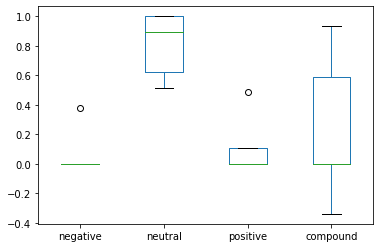

In [37]:
df.plot.box()

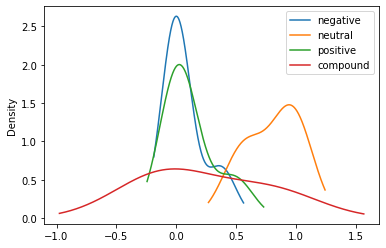

In [38]:
df.plot.kde()

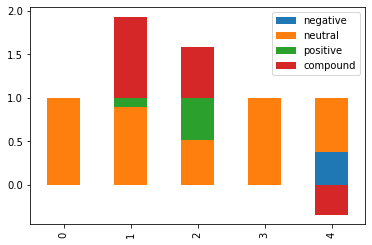

In [39]:
df.plot.bar(stacked=True);

In [40]:
import plotly.express as px

fig = px.histogram(df, x='final_pred', template='plotly_white', title='Email Sentimental Analysis')
fig.update_xaxes(categoryorder='total descending').update_yaxes(title='Emails Tendence')
fig.show()

In [41]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=['negative', 'neutral', 'positive', 'compound']))
fig.show()

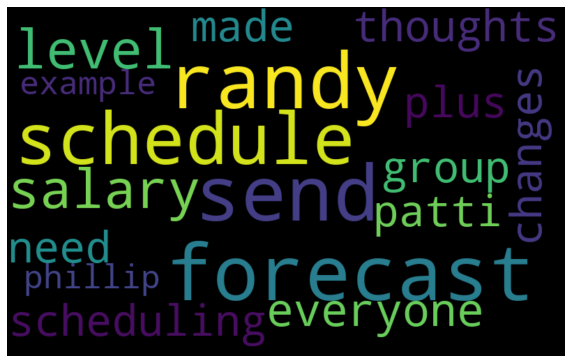

In [42]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

normal_words =' '.join([text for text in df['rating'][df['neutral'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

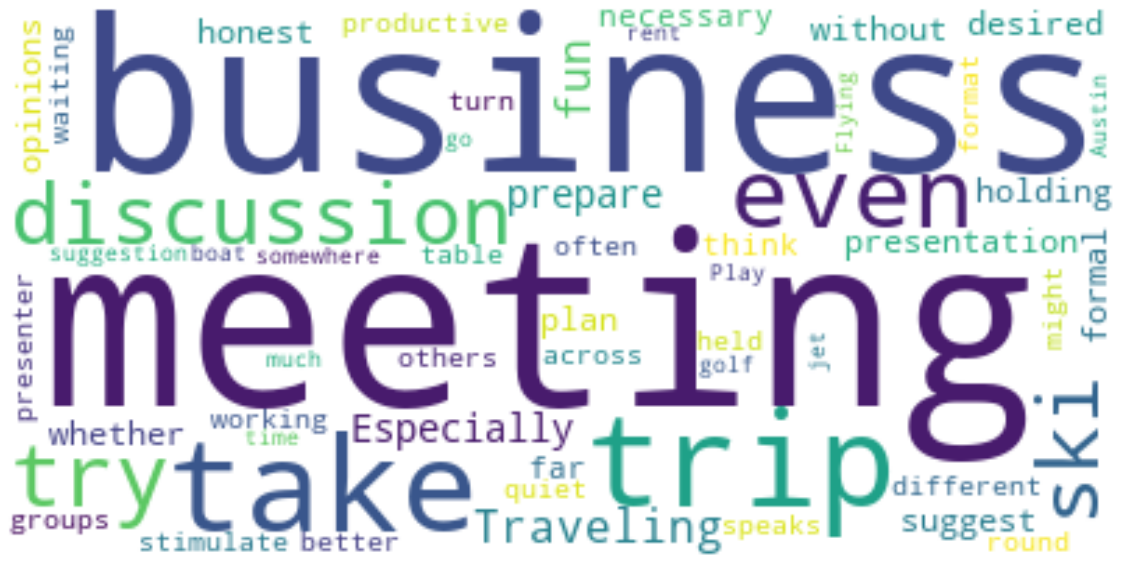

In [44]:
wordcloud_spam = WordCloud(background_color="white").generate(emails)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()